In [177]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)

In [178]:
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [179]:
import numpy as np
import pandas as pd

<Axes: xlabel='x', ylabel='y'>

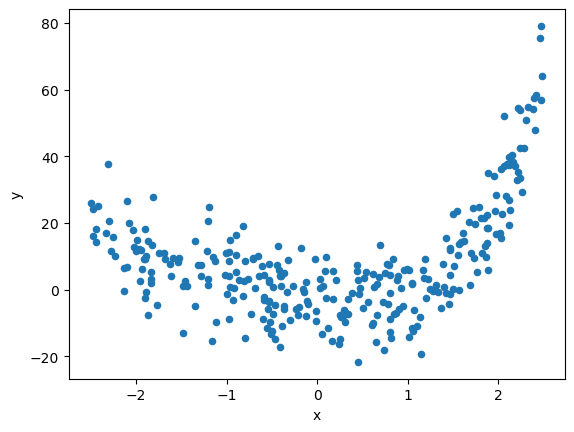

In [180]:
size = 300
X_1 = np.random.rand(size)*5 - 2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y_1 = w4*(X_1**4) + w3*(X_1**3) + w2*(X_1**2) + w1*X_1 + w0 + np.random.randn(size)*8 - 4
df = pd.DataFrame({'x': X_1, 'y': y_1})
df.plot.scatter(x='x', y='y')

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X = data_breast_cancer['data'].loc[:, ['mean texture', 'mean symmetry']]
y = data_breast_cancer['target']

In [183]:
print(X, y)

     mean texture  mean symmetry
0           10.38         0.2419
1           17.77         0.1812
2           21.25         0.2069
3           20.38         0.2597
4           14.34         0.1809
..            ...            ...
564         22.39         0.1726
565         28.25         0.1752
566         28.08         0.1590
567         29.33         0.2397
568         24.54         0.1587

[569 rows x 2 columns] 0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [185]:
from sklearn.tree import DecisionTreeClassifier

In [186]:
from sklearn.model_selection import GridSearchCV

In [187]:
param_grid = {'max_depth': [1, 2, 3, 4, 5]}

In [188]:
tree_clf = DecisionTreeClassifier()

In [189]:
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5]}, scoring='f1_macro')

In [190]:
best_max_depth = grid_search.best_params_['max_depth']

In [191]:
tree_clf = DecisionTreeClassifier(max_depth=best_max_depth)

In [192]:
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [193]:
y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)

In [194]:
from sklearn.metrics import f1_score

In [195]:
train_f1 = f1_score(y_train, y_train_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

In [196]:
print(train_f1)
print(test_f1)

0.748428516981679
0.7146565310095485


In [197]:
from sklearn.metrics import accuracy_score

In [198]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [199]:
print(test_acc)
print(train_acc)

0.7631578947368421
0.7736263736263737


In [200]:
from sklearn.tree import export_graphviz

In [201]:
f = 'bc.png'

In [202]:
export_graphviz(tree_clf, out_file=f, 
                feature_names=['mean texture', 'mean symmetry'], 
                class_names=[str(num) + ", " + name for num, name in zip(set(data_breast_cancer.target), data_breast_cancer.target_names)], 
                rounded=True, filled=True)

In [203]:
import pickle

In [204]:
f1_acc = [best_max_depth, train_f1, test_f1, train_acc, test_acc]

In [205]:
with open('f1acc_tree.pkl', 'wb') as f:
    pickle.dump(f1_acc, f)

In [206]:
# Regression 

In [207]:
X = X_1.reshape(-1, 1)
y = y_1.reshape(-1, 1)

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [209]:
from sklearn.tree import DecisionTreeRegressor

In [210]:
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}

In [211]:
tree_reg = DecisionTreeRegressor()

In [212]:
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14]},
             scoring='neg_mean_squared_error')

In [213]:
best_param = grid_search.best_params_['max_depth']

In [214]:
tree_reg = DecisionTreeRegressor(max_depth=best_param)

In [215]:
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=4)

In [216]:
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

In [217]:
from sklearn.metrics import mean_squared_error

In [218]:
y_train_mse = mean_squared_error(y_train, y_train_pred)
y_test_mse = mean_squared_error(y_test, y_test_pred)

In [219]:
print(y_train_mse)
print(y_test_mse)

64.42118742569888
37.67311135987837


In [220]:
mse_acc = [best_param, y_train_mse, y_test_mse]

In [221]:
print(mse_acc)

[4, 64.42118742569888, 37.67311135987837]


In [93]:
with open('mse_tree.pkl', 'wb') as f:
    pickle.dump(mse_acc, f)

In [94]:
f = 'reg.png'

In [95]:
export_graphviz(tree_reg, out_file=f, 
                feature_names=['X'], 
                class_names=[str(num) + ", " + name for num, name in zip(set(data_breast_cancer.target), data_breast_cancer.target_names)], 
                rounded=True, filled=True)